# Lab 6 - An overview of torchvision

Torchvision is a library which augments PyTorch by introducing several datasets, model architectures and routines for doing computer vision with PyTorch.

We will first of all be talking about the routines.

## Preface

Torchvision supports two sets of backend for working with images and videos:

* `image_backend`
  * `PIL`: one of the most well-known libraries for image processing in Python
  * `accimage`: library for very fast image loading. As of v.0.2.0, supports only resizing, cropping, and transposing
* `video_backend`
  * `pyav`
  * `video_reader`

We will be working with images using the `PIL` backend (the default one).

In [17]:
import torchvision
import torch

torchvision.get_image_backend()

'PIL'

## Routines for computer vision


### IO

The first module we will be viewing today is `torchvision.io`, which is used to open images and videos. We will use it for images only.

In [8]:
from torchvision import io
from PIL import Image

img_path = "imgs/06/cat.jpeg"

img = io.read_image(img_path)

In [4]:
type(img) # is a tensor

torch.Tensor

<class 'PIL.JpegImagePlugin.JpegImageFile'>


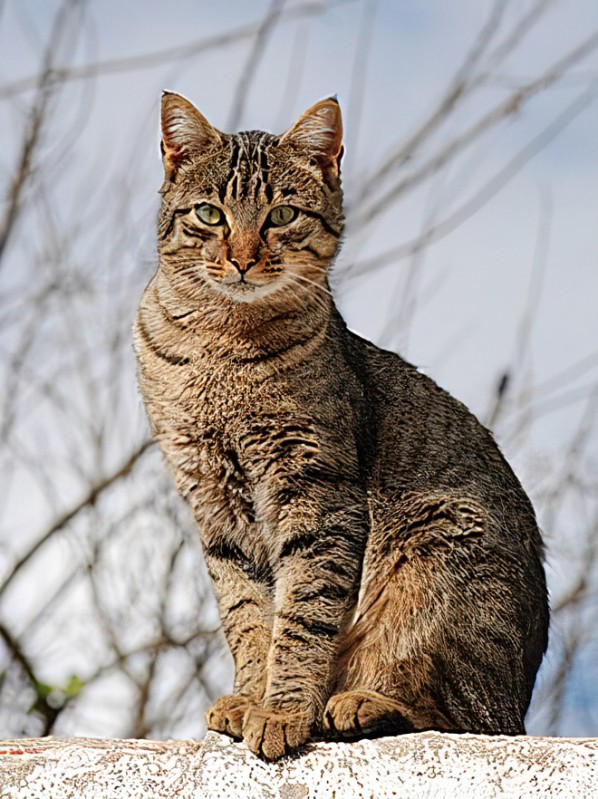

In [11]:
# compare it with PIL
img_PIL = Image.open(img_path)
print(type(img_PIL)) # is a PIL image
img_PIL

### [Datasets](https://pytorch.org/vision/0.8/datasets.html)

Torchvision has APIs for working with the most common datasets.

We have already used MNIST, but there are also its variants ([EMNIST](https://www.westernsydney.edu.au/icns/reproducible_research/publication_support_materials/emnist), [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist), [KMNIST](https://github.com/rois-codh/kmnist)...), CIFAR10 and CIFAR100...

In [18]:
def array2PIL(arr):
    if isinstance(arr, torch.Tensor):
        arr = arr.numpy()
    return Image.fromarray(arr, mode="RGB")

Files already downloaded and verified
6


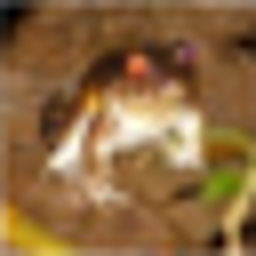

In [21]:
from torchvision import datasets

cifar_train = datasets.CIFAR10(root='./datasets', train=True, download=True)
print(cifar_train.targets[0])
array2PIL(cifar_train.data[0]).resize((256, 256))